<a href="https://colab.research.google.com/github/Mainak156/Gatekeeper-AI/blob/main/ML_Mini_Project_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== XOR DataFrame ===
    X1   X2  Y
0  0.0  0.0  0
1  0.0  1.0  1
2  1.0  0.0  1
3  1.0  1.0  0 

=== Dataset Summary ===
Rows: 4, Columns: 3
Data types: {'X1': dtype('float64'), 'X2': dtype('float64'), 'Y': dtype('int64')}

Small sample (it’s the whole dataset, honestly):
    X1   X2  Y
0  0.0  0.0  0
1  0.0  1.0  1
2  1.0  0.0  1
3  1.0  1.0  0 

=== Basic Statistics for Y (XOR) ===
Mean: 0.50
Median: 0.50
Mode(s): [np.int64(0), np.int64(1)] (counts: Counter({np.int64(0): 2, np.int64(1): 2}))
Min: 0, Max: 1, Range: 1
Std Dev: 0.50

[Saved] xor_line_graph_over_y_instances.png


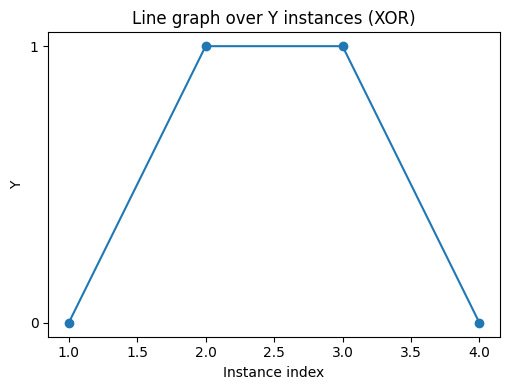

[Saved] xor_scatter_x1_vs_x2_by_y.png


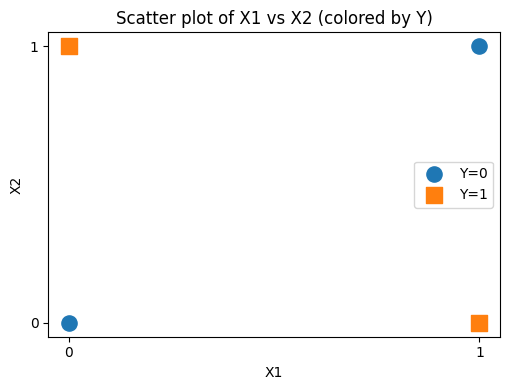

[Saved] xor_histogram_y.png


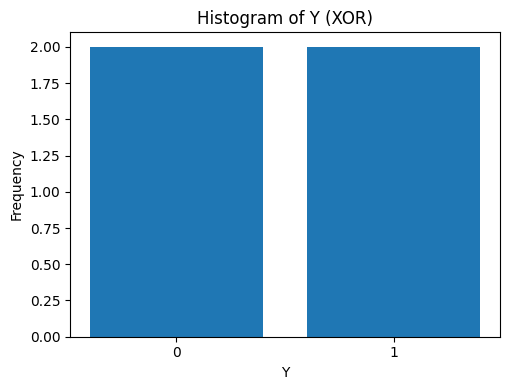

[Saved] xor_3d_scatter.png


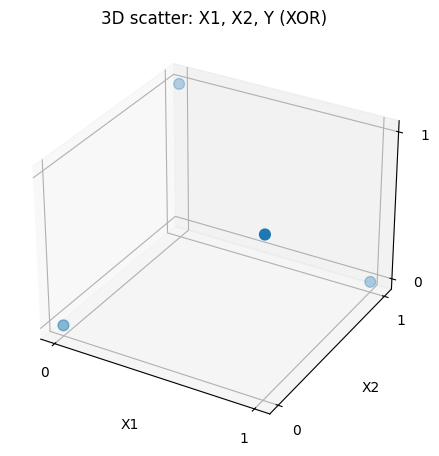

=== Single-Layer Perceptron (Baseline) ===
Predictions: [0 0 0 0]
Accuracy: 0.5
Confusion Matrix:
 [[2 0]
 [2 0]] 

[Saved] xor_decision_surface_perceptron.png


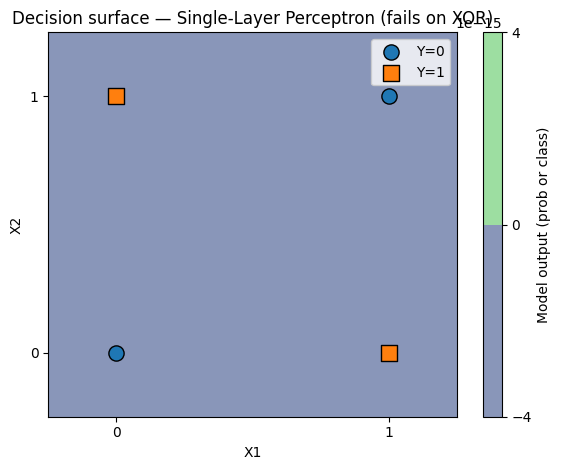

=== Multi-Layer Perceptron (ANN) ===
Predictions: [0 1 1 0]
Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[Saved] xor_mlp_loss_curve.png


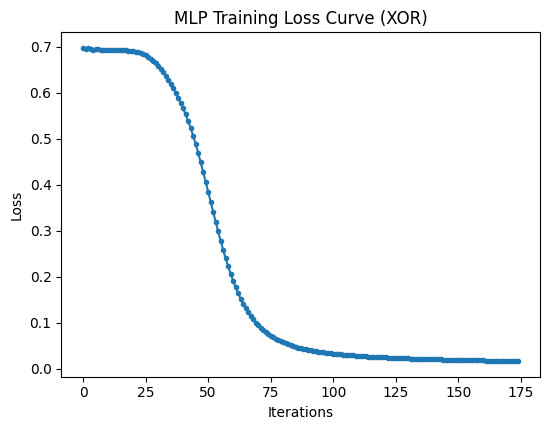

[Saved] xor_decision_surface_mlp.png


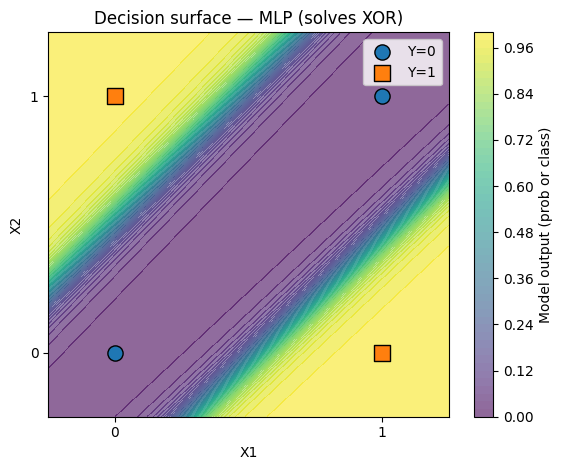

[Saved] xor_mlp_3d_probability_surface.png


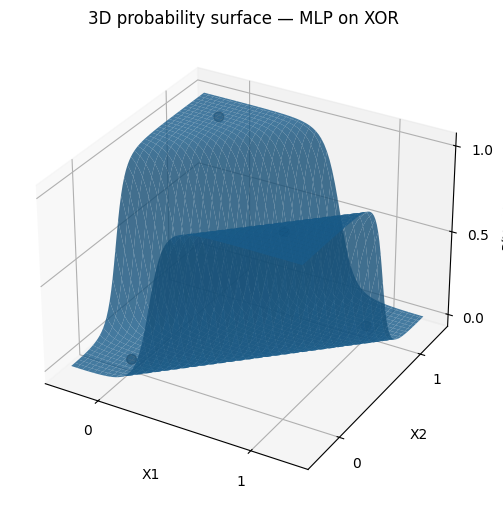

[Saved] xor_line_actual_vs_pred_mlp.png


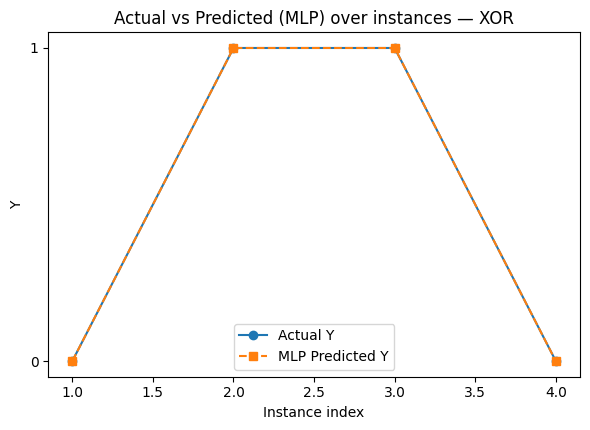


All done! 🎉
Saved images you can use in the poster:
- xor_line_graph_over_y_instances.png
- xor_scatter_x1_vs_x2_by_y.png
- xor_histogram_y.png
- xor_3d_scatter.png
- xor_decision_surface_perceptron.png  (shows linear model failing)
- xor_mlp_loss_curve.png
- xor_decision_surface_mlp.png
- xor_mlp_3d_probability_surface.png
- xor_line_actual_vs_pred_mlp.png


In [ ]:
# XOR with MLP (ANN) — end-to-end, poster-ready
# ------------------------------------------------
# What I'm doing here:
# 1) Create the XOR dataset (X1, X2 -> Y)
# 2) Show dataset summary + basic stats (mean/median/mode etc.)
# 3) Plot a bunch of visuals (line, scatter, histogram, 3D, decision surface)
# 4) Train a *single-layer perceptron* baseline to show it fails on XOR
# 5) Train a small MLP (2 hidden neurons) to solve XOR
# 6) Compare predictions + accuracy and save all plots as PNGs for the poster

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For reproducibility
np.random.seed(42)

# -----------------------------
# 1) XOR dataset (tiny but classic)
# -----------------------------
# Truth table:
# X1 X2 | Y (XOR)
# 0  0  | 0
# 0  1  | 1
# 1  0  | 1
# 1  1  | 0
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([0,1,1,0], dtype=int)

df = pd.DataFrame(X, columns=["X1", "X2"])
df["Y"] = y
print("=== XOR DataFrame ===")
print(df, "\n")

# -----------------------------
# 2) Dataset summary + basic stats
# -----------------------------
n_rows, n_cols = df.shape
dtypes = df.dtypes.to_dict()

# basic stats for Y (even though it's binary, these are helpful for the poster)
y_mean = float(np.mean(y))
y_median = float(np.median(y))
# for mode on a tiny binary vector, both 0 and 1 occur twice → 2 modes
counts = Counter(y)
max_count = max(counts.values())
modes = [k for k, v in counts.items() if v == max_count]
y_min, y_max = int(np.min(y)), int(np.max(y))
y_range = y_max - y_min
y_std = float(np.std(y, ddof=0))

print("=== Dataset Summary ===")
print(f"Rows: {n_rows}, Columns: {n_cols}")
print("Data types:", dtypes)
print("\nSmall sample (it’s the whole dataset, honestly):")
print(df.head(), "\n")

print("=== Basic Statistics for Y (XOR) ===")
print(f"Mean: {y_mean:.2f}")
print(f"Median: {y_median:.2f}")
print(f"Mode(s): {modes} (counts: {counts})")
print(f"Min: {y_min}, Max: {y_max}, Range: {y_range}")
print(f"Std Dev: {y_std:.2f}\n")

# Helper to save + show figures cleanly
def savefig(title_snake):
    plt.tight_layout()
    filename = f"{title_snake}.png"
    plt.savefig(filename, dpi=200)
    print(f"[Saved] {filename}")

# --------------------------------
# 3) Visuals (at least 5 for poster)
# --------------------------------

# (i) Line graph over Y instances
plt.figure(figsize=(5.2, 4))
plt.plot(range(1, len(y)+1), y, marker="o")
plt.title("Line graph over Y instances (XOR)")
plt.xlabel("Instance index")
plt.ylabel("Y")
plt.yticks([0,1])
savefig("xor_line_graph_over_y_instances")
plt.show()

# (ii) Scatter plot X1 vs X2 colored by Y
plt.figure(figsize=(5.2, 4))
for label, marker in zip([0,1], ["o","s"]):
    pts = X[y==label]
    plt.scatter(pts[:,0], pts[:,1], s=120, marker=marker, label=f"Y={label}")
plt.title("Scatter plot of X1 vs X2 (colored by Y)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xticks([0,1]); plt.yticks([0,1])
plt.legend()
savefig("xor_scatter_x1_vs_x2_by_y")
plt.show()

# (iii) Histogram of Y
plt.figure(figsize=(5.2, 4))
plt.hist(y, bins=[-0.5,0.5,1.5], rwidth=0.8)  # bins centered on 0 and 1
plt.title("Histogram of Y (XOR)")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.xticks([0,1])
savefig("xor_histogram_y")
plt.show()

# (iv) 3D scatter: X1, X2, Y
fig = plt.figure(figsize=(5.6, 4.6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, s=60)
ax.set_title("3D scatter: X1, X2, Y (XOR)")
ax.set_xlabel("X1"); ax.set_ylabel("X2"); ax.set_zlabel("Y")
ax.set_xticks([0,1]); ax.set_yticks([0,1]); ax.set_zticks([0,1])
plt.tight_layout()
filename = "xor_3d_scatter.png"
plt.savefig(filename, dpi=200)
print(f"[Saved] {filename}")
plt.show()

# -----------------------------
# Baseline: Single-Layer Perceptron (expected to FAIL for XOR)
# -----------------------------
# I’m training a classic perceptron to make the point that XOR is not linearly separable.
perceptron = Perceptron(max_iter=2000, eta0=0.1, random_state=42)
perceptron.fit(X, y)
y_pred_perc = perceptron.predict(X)
acc_perc = accuracy_score(y, y_pred_perc)
print("=== Single-Layer Perceptron (Baseline) ===")
print("Predictions:", y_pred_perc)
print("Accuracy:", acc_perc)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_perc), "\n")
# Expected: accuracy around 0.5 because a single line can't separate XOR.

# Quick decision surface plot function (2D) to visualize boundaries
def plot_decision_surface(model, X, y, title, fname):
    # Make a grid a bit larger than [0,1] so the boundary is obvious
    xx, yy = np.meshgrid(
        np.linspace(-0.25, 1.25, 300),
        np.linspace(-0.25, 1.25, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Some models (like Perceptron) only support predict, not predict_proba
    try:
        zz = model.predict_proba(grid)[:, 1]
    except Exception:
        zz = model.predict(grid)
    zz = zz.reshape(xx.shape)

    plt.figure(figsize=(5.8, 4.8))
    # Filled contour of model output
    cs = plt.contourf(xx, yy, zz, levels=50, alpha=0.6)
    plt.colorbar(cs, label="Model output (prob or class)")
    # Overlay training points
    for label, marker in zip([0,1], ["o","s"]):
        pts = X[y==label]
        plt.scatter(pts[:,0], pts[:,1], s=120, marker=marker, edgecolors="k", label=f"Y={label}")
    plt.title(title)
    plt.xlabel("X1"); plt.ylabel("X2")
    plt.xticks([0,1]); plt.yticks([0,1])
    plt.legend()
    savefig(fname)
    plt.show()

plot_decision_surface(perceptron, X, y,
                      "Decision surface — Single-Layer Perceptron (fails on XOR)",
                      "xor_decision_surface_perceptron")

# --------------------------------------
# 4) Multi-Layer Perceptron (ANN) — the fix
# --------------------------------------
# Tiny network is enough for XOR: 2 hidden neurons, sigmoid (logistic) activation.
# I’m using 'adam' so I also get a loss curve to show learning progress.
mlp = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',      # sigmoid; ReLU also works, but sigmoid is classic for XOR
    solver='adam',
    learning_rate_init=0.1,     # relatively high because dataset is so tiny
    max_iter=4000,
    random_state=42
)

mlp.fit(X, y)
y_pred_mlp = mlp.predict(X)
acc_mlp = accuracy_score(y, y_pred_mlp)
print("=== Multi-Layer Perceptron (ANN) ===")
print("Predictions:", y_pred_mlp)
print("Accuracy:", acc_mlp)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y, y_pred_mlp, zero_division=0))

# (v) Loss curve (nice line chart for the poster)
if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(5.6, 4.4))
    plt.plot(mlp.loss_curve_, marker=".")
    plt.title("MLP Training Loss Curve (XOR)")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    savefig("xor_mlp_loss_curve")
    plt.show()

# (vi) Decision surface for MLP (this should look 'non-linear' and correct)
plot_decision_surface(mlp, X, y,
                      "Decision surface — MLP (solves XOR)",
                      "xor_decision_surface_mlp")

# (vii) 3D probability surface for MLP (optional but looks cool on a poster)
# Here Z is the predicted probability of class 1 across the (X1, X2) grid.
xx, yy = np.meshgrid(
    np.linspace(-0.25, 1.25, 80),
    np.linspace(-0.25, 1.25, 80)
)
grid = np.c_[xx.ravel(), yy.ravel()]
zz = mlp.predict_proba(grid)[:, 1].reshape(xx.shape)

fig = plt.figure(figsize=(6.2, 5.2))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xx, yy, zz, linewidth=0, antialiased=True, alpha=0.8)
ax.scatter(X[:,0], X[:,1], y, color="k", s=50)  # actual points
ax.set_title("3D probability surface — MLP on XOR")
ax.set_xlabel("X1"); ax.set_ylabel("X2"); ax.set_zlabel("P(Y=1)")
ax.set_xticks([0,1]); ax.set_yticks([0,1]); ax.set_zticks([0,0.5,1.0])
plt.tight_layout()
filename = "xor_mlp_3d_probability_surface.png"
plt.savefig(filename, dpi=220)
print(f"[Saved] {filename}")
plt.show()

# --------------------------------------
# 5) Side-by-side "pred vs actual" line (simple visual)
# --------------------------------------
# This matches the "line over Y instances" vibe but shows both arrays.
plt.figure(figsize=(6, 4.4))
plt.plot(range(1, len(y)+1), y, marker="o", label="Actual Y")
plt.plot(range(1, len(y)+1), y_pred_mlp, marker="s", linestyle="--", label="MLP Predicted Y")
plt.title("Actual vs Predicted (MLP) over instances — XOR")
plt.xlabel("Instance index")
plt.ylabel("Y")
plt.yticks([0,1])
plt.legend()
savefig("xor_line_actual_vs_pred_mlp")
plt.show()

print("\nAll done! 🎉")
print("Saved images you can use in the poster:")
print("- xor_line_graph_over_y_instances.png")
print("- xor_scatter_x1_vs_x2_by_y.png")
print("- xor_histogram_y.png")
print("- xor_3d_scatter.png")
print("- xor_decision_surface_perceptron.png  (shows linear model failing)")
print("- xor_mlp_loss_curve.png")
print("- xor_decision_surface_mlp.png")
print("- xor_mlp_3d_probability_surface.png")
print("- xor_line_actual_vs_pred_mlp.png")
